# K-Means Clustering

##### Ing. Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingenieria de Sistemas. USTA

Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

Reference: https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Interactive-K-Means

## EJEMPLO DIGITOS

Al igual que en las anteriores guias, podemos trabjar el ejercicio de digitos tambien con K-Means.

Con K-means podemos identificar dígitos similares sin usar la información de la etiqueta original, esto podria ser similar a un FISRT STEP que extraiga el significado de un nuevo conjunto de datos sobre el cual no tienen ninguna informaicon de etiqueta ***Priori***

Comenzaremos cargando los dígitos y luego encontrando los **KMeans** grupos.

Recuerde que los dígitos consisten en 1797 muestras con 64 características, donde cada una de las 64 características es el brillo de un píxel en una imagen de 8×8:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from IPython.display import Image
from sklearn.cluster import KMeans

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

La agrupacion seria:

In [6]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

El resultado son 10 clústeres en 64 dimensiones. Tenga en cuenta que los propios centros del grupo son puntos de 64 dimensiones y pueden interpretarse como el dígito "típico" dentro del grupo. Veamos cómo se ven estos centros de conglomerados:

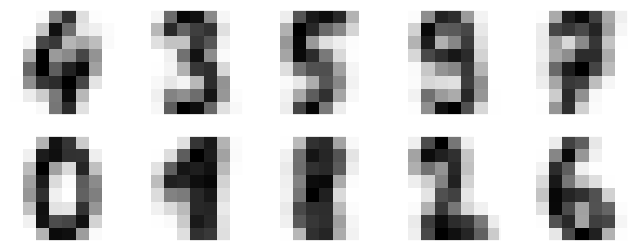

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Vemos que incluso sin las etiquetas , KMeanses capaz de encontrar grupos cuyos centros son dígitos reconocibles, quizás con la excepción de 1 y 8.

Debido a que k -means no sabe nada sobre la identidad del grupo, las etiquetas 0–9 pueden permutarse. Podemos arreglar esto haciendo coincidir cada etiqueta de clúster aprendida con las etiquetas verdaderas que se encuentran en ellos:

In [8]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Ahora podemos verificar qué tan precisa fue nuestra agrupación no supervisada para encontrar dígitos similares dentro de los datos:

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

***¡ Con solo un simple algoritmo k -means, descubrimos la agrupación correcta para el 80% de los dígitos de entrada!*** Revisemos la matriz de confusión para esto:

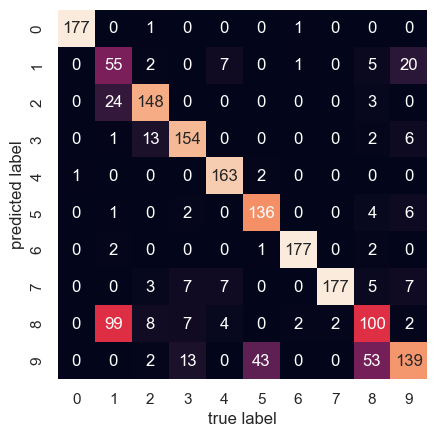

In [10]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Como cabría esperar de los centros de los cúmulos que visualizamos antes, el principal punto de confusión está entre los ochos y los unos. 

***¡ Pero esto todavía muestra que usando k -means, podemos construir esencialmente un clasificador de dígitos sin referencia a ninguna etiqueta conocida !***

**/(°^°)/ Warning**

Podemos mejorar esto con ayuda de la guia de Manifold Learnign superando el score de accuracy.

Podemos usar el algoritmo de incrustación de vecinos estocásticos distribuidos en (t-SNE) para preprocesar los datos antes de realizar k -means. t-SNE es un algoritmo de incrustación no lineal que es particularmente hábil para preservar puntos dentro de grupos. Veamos cómo lo hace:


In [11]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

D:\SOFTWARE\Anaconda 3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0.9426822481914302

Eso es casi un 92% de precisión de clasificación sin usar las etiquetas . Este es el poder del aprendizaje no supervisado cuando se usa con cuidado: puede extraer información del conjunto de datos que podría ser difícil de hacer a mano oa simple vista.